### Preliminaries

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df=pd.read_pickle("saved_df.pkl")

### Explore Data

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(707, 9)

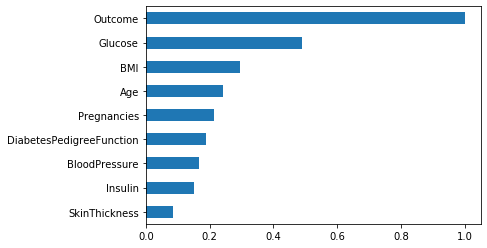

In [5]:
df.corr()["Outcome"].sort_values().plot.barh()

In [6]:
##Create the features matrix and Create the target vector
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
##Split Into Training And Test Sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Logistic Regression**

In [7]:
##Create the Logistic Model
log_model=LogisticRegression()
#Fit the model
log_model.fit(X_train,y_train)
#Predict the test set
y_pred=log_model.predict(X_test)
#Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121  16]
 [ 34  42]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       137
           1       0.72      0.55      0.63        76

    accuracy                           0.77       213
   macro avg       0.75      0.72      0.73       213
weighted avg       0.76      0.77      0.76       213



**K-Nearest Neighbor**

In [8]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
536,0,105,90,0,0,29.6,0.197,46
74,1,79,75,30,0,32.0,0.396,22
242,3,139,54,0,0,25.6,0.402,22
630,7,114,64,0,0,27.4,0.732,34
537,0,57,60,0,0,21.7,0.735,67


In [9]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,3.597166,121.255061,73.054656,21.200405,85.892713,32.420648,0.475682,32.971660
std,3.117326,30.173597,12.192134,15.605504,121.364331,6.949658,0.341965,11.779379
min,0.000000,56.000000,40.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.600000,0.245250,24.000000
50%,3.000000,116.000000,73.000000,23.000000,47.000000,32.150000,0.371000,29.000000
75%,5.750000,140.750000,80.000000,33.000000,130.000000,36.175000,0.625500,40.000000
max,12.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [10]:
#Standardize Features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
a=pd.DataFrame(X_train, columns=X.columns)

In [12]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


In [13]:
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-1.155097,-0.539264,1.391268,-1.359898,-0.708444,-0.406280,-0.815770,1.107151
1,-0.833984,-1.401818,0.159719,0.564449,-0.708444,-0.060589,-0.233249,-0.932374
2,-0.191758,0.588691,-1.564449,-1.359898,-0.708444,-0.982431,-0.215686,-0.932374
3,1.092694,-0.240688,-0.743417,-1.359898,-0.708444,-0.723163,0.750304,0.087389
4,-1.155097,-2.131671,-1.071830,-1.359898,-0.708444,-1.544179,0.759086,2.891734


In [14]:
#Create and fit the Model
knn_model=KNeighborsClassifier().fit(X_train, y_train)

In [15]:
#Predict the test set
y_pred=knn_model.predict(X_test)
#Evaluate model performance
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[120  17]
 [ 37  39]]
              precision    recall  f1-score   support

           0       0.76      0.88      0.82       137
           1       0.70      0.51      0.59        76

    accuracy                           0.75       213
   macro avg       0.73      0.69      0.70       213
weighted avg       0.74      0.75      0.74       213



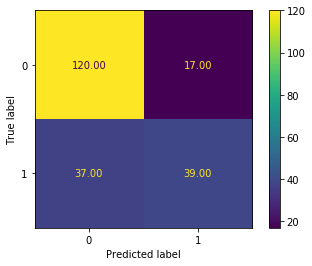

In [16]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model,X_test,y_test, values_format=".2f")


**Model Tunning**

In [17]:
knn = KNeighborsClassifier()

In [18]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [19]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [20]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train, y_train)

In [21]:
knn_cv_model.best_params_

{'n_neighbors': 15}

In [22]:
knn_tuned = KNeighborsClassifier(n_neighbors = 15).fit(X_train, y_train)

In [23]:
y_pred = knn_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       137
           1       0.70      0.49      0.57        76

    accuracy                           0.74       213
   macro avg       0.73      0.69      0.69       213
weighted avg       0.74      0.74      0.73       213



**GridSearch with recall**

In [24]:
knn_cv_model = GridSearchCV(knn, knn_params, scoring = "recall", cv=10).fit(X_train, y_train)

In [25]:
knn_cv_model.best_params_

{'n_neighbors': 3}

In [26]:
knn_tuned_2 = KNeighborsClassifier(n_neighbors = 3).fit(X_train, y_train)
y_pred = knn_tuned_2.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       137
           1       0.65      0.51      0.57        76

    accuracy                           0.73       213
   macro avg       0.70      0.68      0.69       213
weighted avg       0.72      0.73      0.72       213



**Model Deployment**

In [27]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       146
           1       0.60      0.54      0.57        67

    accuracy                           0.74       213
   macro avg       0.70      0.69      0.69       213
weighted avg       0.74      0.74      0.74       213



**saving the model**

In [28]:
import pickle
pickle.dump(log_model, open("my_model", 'wb'))

In [29]:
model = pickle.load(open("my_model", "rb"))

**predictions with the saved model**

In [30]:
prediction = model.predict(X)

In [31]:
prediction[:5]

array([1, 0, 1, 0, 1], dtype=int64)

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df["Pred"]=model.predict(X)

In [34]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred
746,1,147,94,41,0,49.3,0.358,27,1,0
739,1,102,74,0,0,39.5,0.293,42,1,0
53,8,176,90,34,300,33.7,0.467,58,1,1
553,1,88,62,24,44,29.9,0.422,23,0,0
351,4,137,84,0,0,31.2,0.252,30,0,0
622,6,183,94,0,0,40.8,1.461,45,0,1
218,5,85,74,22,0,29.0,1.224,32,1,1
63,2,141,58,34,128,25.4,0.699,24,0,0
613,6,105,80,28,0,32.5,0.878,26,0,1
759,6,190,92,0,0,35.5,0.278,66,1,1


In [35]:
pred_prob = model.predict_proba(X)

In [36]:
pred_prob[:5][:,1]

array([0.67733412, 0.07721411, 0.88564853, 0.05953191, 0.9934216 ])

In [37]:
df["Prob"]=pred_prob[:,1]

In [38]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pred,Prob
509,8,120,78,0,0,25.0,0.409,64,0,0,0.331898
0,6,148,72,35,0,33.6,0.627,50,1,1,0.677334
746,1,147,94,41,0,49.3,0.358,27,1,0,0.373806
189,5,139,80,35,160,31.6,0.361,25,1,0,0.336723
339,7,178,84,0,0,39.9,0.331,41,1,1,0.763253
722,1,149,68,29,127,29.3,0.349,42,1,0,0.252382
95,6,144,72,27,228,33.9,0.255,40,0,0,0.397240
712,10,129,62,36,0,41.2,0.441,38,1,1,0.804101
472,0,119,66,27,0,38.8,0.259,22,0,0,0.214022
667,10,111,70,27,0,27.5,0.141,40,1,0,0.312516


**prediction for a single patient**

In [39]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [40]:
my_dict={'Pregnancies':10, 
        'Glucose':180, 
        'BloodPressure':70,
        'SkinThickness':30,
        'Insulin':50,
        'BMI':38, 
        'DiabetesPedigreeFunction':0.15,
        'Age':50}

In [41]:
df_sample=pd.DataFrame([my_dict])

In [42]:
df_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,10,180,70,30,50,38,0.15,50


In [43]:
single_pred=model.predict(df_sample)

In [44]:
print(single_pred)

[1]


In [45]:
single_pred_prob=model.predict_proba(df_sample)

In [46]:
print(single_pred_prob[:,1])

[0.79344574]
